In [ ]:
# Glass Identification Project
# Samrat Dey
# Batch - DS2312

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [53]:
col=['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of Glass']
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv',names=col, header = None)
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


The dataset contains the information of types of glasses where numerical data are present. Here 'Type of Glass' is the target variable which contains 2 categories, window glass (classes 1-4) and non-window glass (classes 5-7) so it will be temed as 'Classification Problem' where we need to predict the Type of Glass based on the attributes of a particular glass.

In [54]:
df.shape

(214, 11)

In [55]:
df.columns.tolist()

['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of Glass']

In [56]:
df.dtypes

Id                 int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of Glass      int64
dtype: object

There are two different types of data (int64, float64) present in the dataset

In [57]:
df.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of Glass    0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of Glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


There are no Null values in the dataset.

In [59]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id, Length: 214, dtype: int64


1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
   

To classify the 'Type of Glass' into two categories window glass (classes 1-4) and non-window glass (classes 5-7), we change the value (1-4) as 1 (for window glass) and we change the value (5-7) as 2 (for non-window glass)

In [60]:
df["Type of Glass"]=df["Type of Glass"].replace(2,1)
df["Type of Glass"]=df["Type of Glass"].replace(3,1)
df["Type of Glass"]=df["Type of Glass"].replace(4,1)
df["Type of Glass"]=df["Type of Glass"].replace(5,2)
df["Type of Glass"]=df["Type of Glass"].replace(6,2)
df["Type of Glass"]=df["Type of Glass"].replace(7,2)

In [61]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id, Length: 214, dtype: int64


1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
   

In [62]:
# Droping Id Column
df.drop("Id", axis=1, inplace=True)

In [63]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,2
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,2
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,2
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,2


<Axes: >

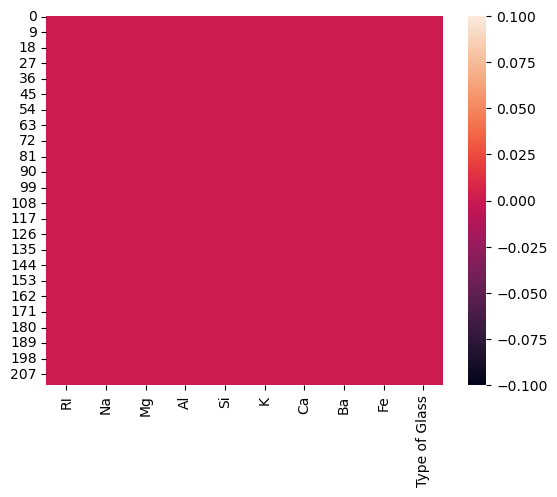

In [64]:
sns.heatmap(df.isnull())

In [65]:
# Checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print("Numerical Columns are:",num_col)
print("\n")

Numerical Columns are: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of Glass']




In [66]:
# Checking nmber of unique values in each column
df.nunique().to_frame("No. of Unique values")

,No. of Unique values
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32
Type of Glass,2


In [67]:
# Statistical summary of numerical columns
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,1.238318
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,0.427053
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,1.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,1.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,2.000000


1. The counts of all the columns are same which means there are no missing values in the dataset
2. The mean value is greater than the median(50%) in RI, Na, Al, Ca, Ba, Fe, Types of Glass, which means the data is skewed to right in these columns
3. The mean value is lesser than the median(50%) in Mg, Si and K which means the data is skewed to left in these columns
4. By summerizing the data we can observe that there are difference between 75% and max in Na, Al, K, Ca, Ba, Fe columns, hence there are outliers present in the data

1    163
2     51
Name: Type of Glass, dtype: int64


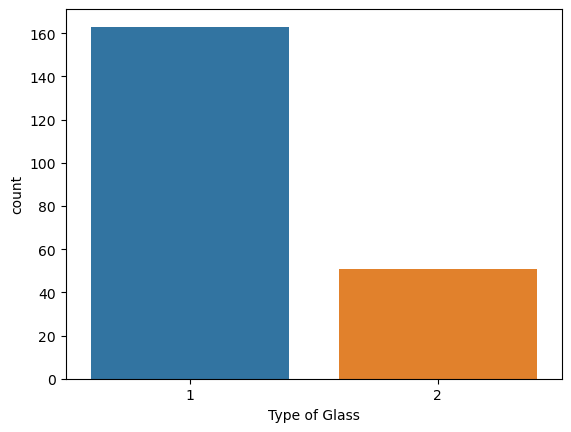

In [68]:
# Visualize the Type of Glasses
ax=sns.countplot(x='Type of Glass',data=df)
print(df['Type of Glass'].value_counts())

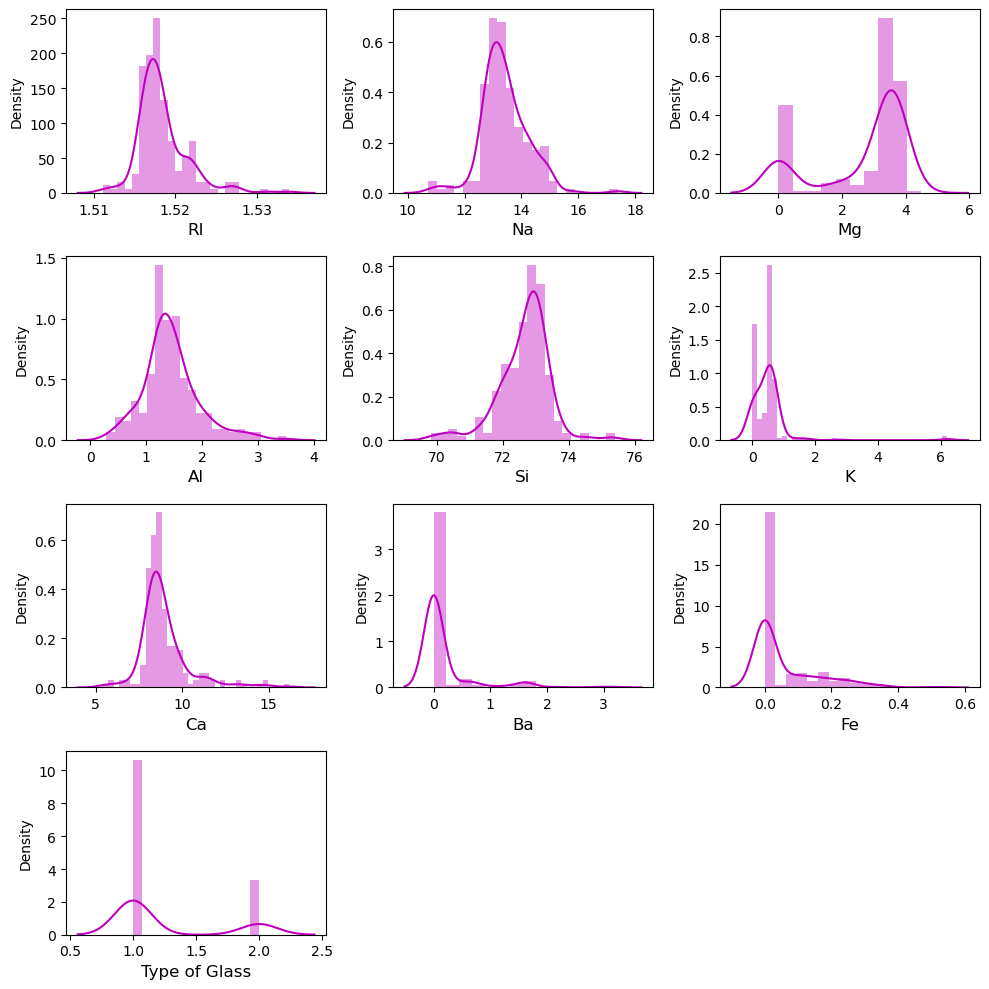

In [69]:
plt.figure(figsize=(10,10),facecolor="white")
plotnumber=1
for col in num_col:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[col],color="m")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

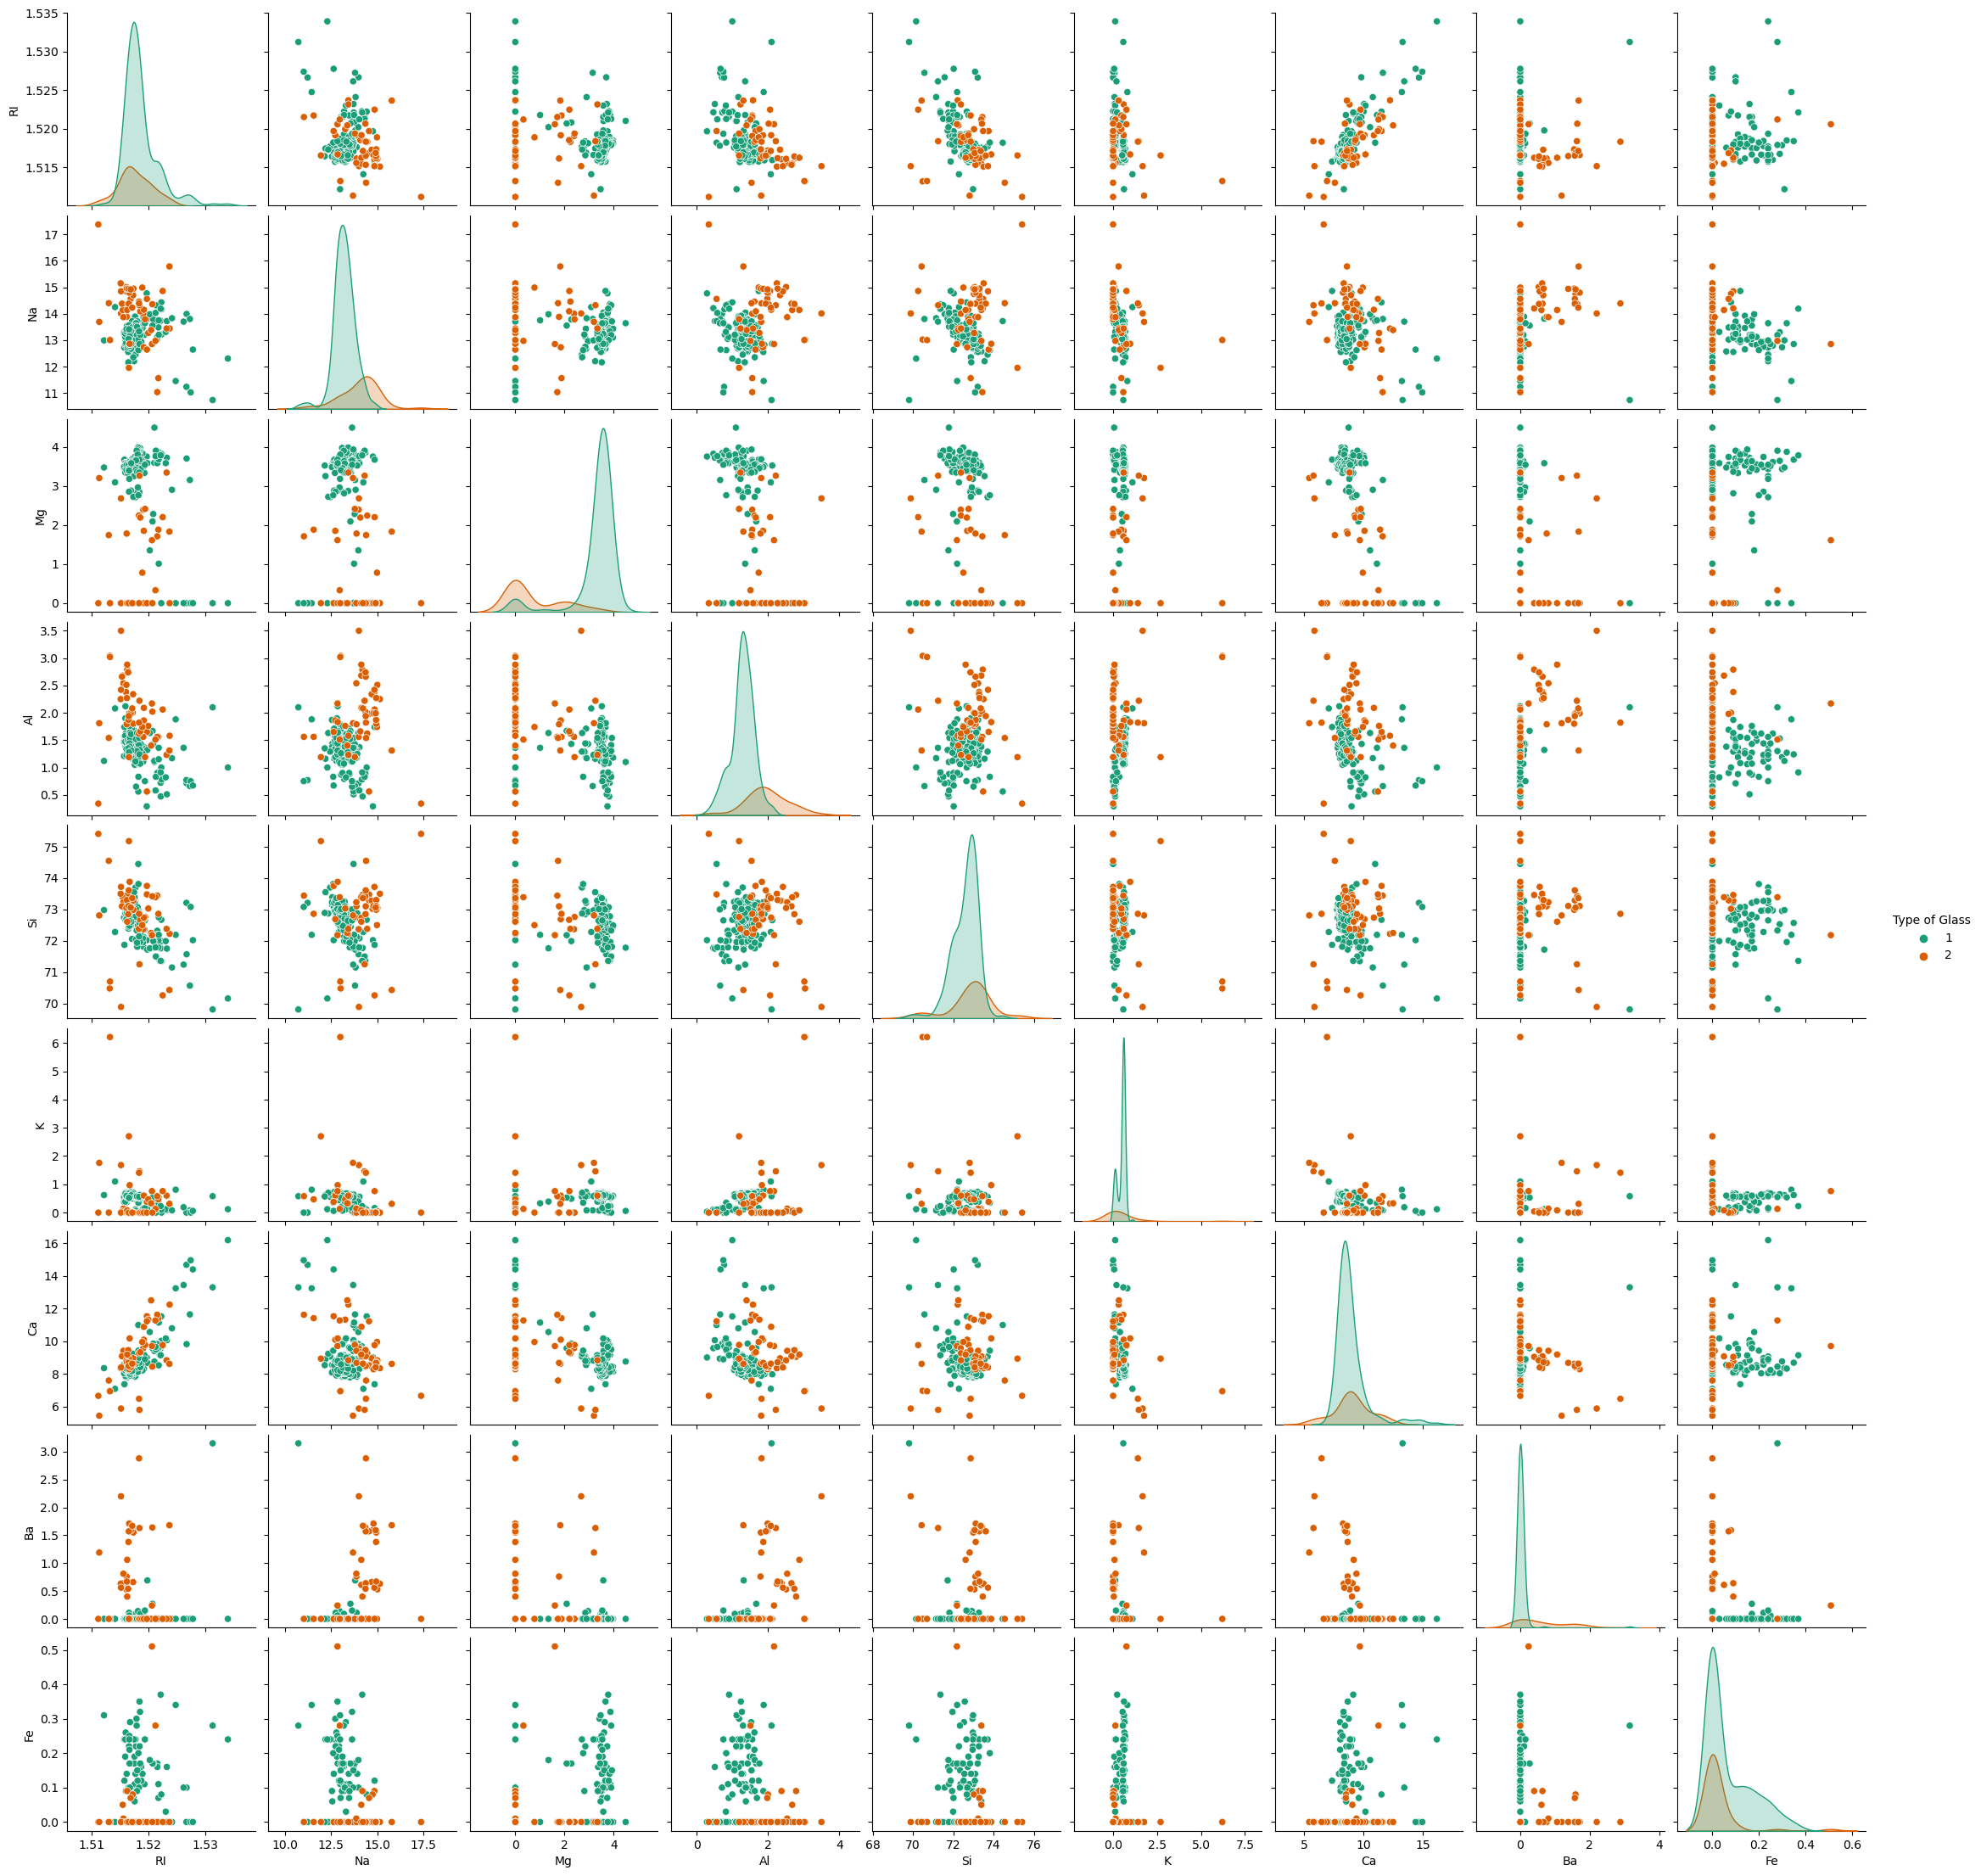

In [71]:
sns.pairplot(df,hue="Type of Glass",palette="Dark2")
plt.show()

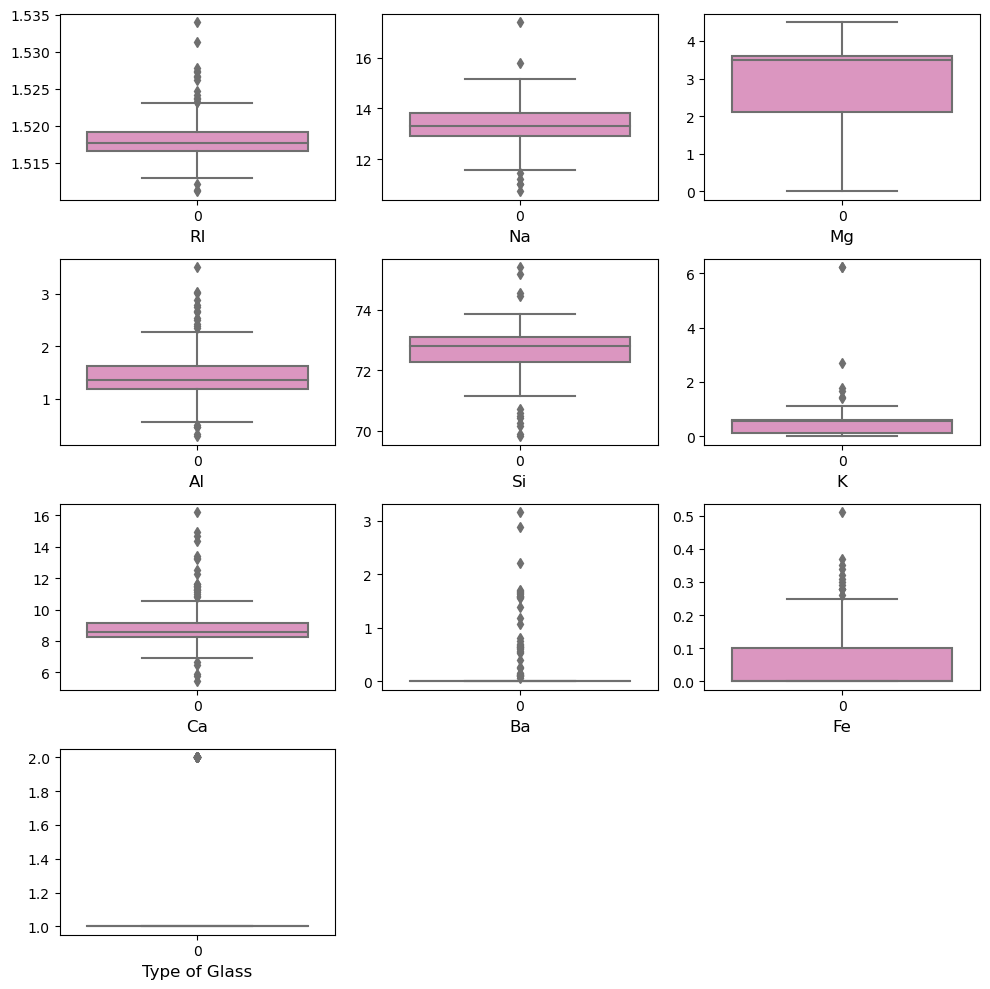

In [72]:
# Checking for outliers by plotting boxplpot
plt.figure(figsize=(10,10),facecolor="white")
plotnumber=1
for col in num_col:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [73]:
df.skew()

RI               1.625431
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Ba               3.416425
Fe               1.754327
Type of Glass    1.237086
dtype: float64

The columns RI, Al, K, Ca, Ba, Fe have skewness in the data and we apply cuberoot method to remove skewness

In [74]:
df["RI"]=np.cbrt(df["RI"])
df["Al"]=np.cbrt(df["Al"])
df["K"]=np.cbrt(df["K"])
df["Ca"]=np.cbrt(df["Ca"])
df["Ba"]=np.cbrt(df["Ba"])
df["Fe"]=np.cbrt(df["Fe"])

In [75]:
df.skew()

RI               1.617049
Na               0.454181
Mg              -1.152559
Al              -0.204132
Si              -0.730447
K               -0.591896
Ca               1.407358
Ba               2.073007
Fe               0.894683
Type of Glass    1.237086
dtype: float64

In [76]:
df["RI"]=np.cbrt(df["RI"])
df["Ca"]=np.cbrt(df["Ca"])
df["Ba"]=np.cbrt(df["Ba"])
df["Fe"]=np.cbrt(df["Fe"])

In [77]:
df.skew()

RI               1.614260
Na               0.454181
Mg              -1.152559
Al              -0.204132
Si              -0.730447
K               -0.591896
Ca               1.181876
Ba               1.756306
Fe               0.762576
Type of Glass    1.237086
dtype: float64

In [78]:
# Statistical summary of numerical columns
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.047497,13.407850,2.684533,1.115447,72.650935,0.668318,1.274454,0.170316,0.265247,1.238318
std,0.000232,0.816604,1.442408,0.131392,0.774546,0.331954,0.020582,0.370211,0.382590,0.427053
min,1.046943,10.730000,0.000000,0.661911,69.810000,0.000000,1.206825,0.000000,0.000000,1.000000
25%,1.047356,12.907500,2.115000,1.059699,72.280000,0.496577,1.264066,0.000000,0.000000,1.000000
50%,1.047445,13.300000,3.480000,1.107932,72.790000,0.821789,1.270086,0.000000,0.000000,1.000000
75%,1.047558,13.825000,3.600000,1.176872,73.087500,0.848093,1.279214,0.000000,0.774264,1.000000
max,1.048685,17.380000,4.490000,1.518294,75.410000,1.838078,1.362576,1.135973,0.927914,2.000000


In [79]:
# Checking the correlation between features and target
cor=df.corr()
cor

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
RI,1.000000,-0.191785,-0.121756,-0.418103,-0.541919,-0.211947,0.798376,-0.115574,0.123757,-0.134500
Na,-0.191785,1.000000,-0.273732,0.077449,-0.069809,-0.539820,-0.261371,0.411271,-0.168702,0.452336
Mg,-0.121756,-0.273732,1.000000,-0.412820,-0.165927,0.443489,-0.416164,-0.524757,0.079989,-0.758289
Al,-0.418103,0.077449,-0.412820,1.000000,0.030268,0.119934,-0.291800,0.500148,-0.044667,0.521192
Si,-0.541919,-0.069809,-0.165927,0.030268,1.000000,-0.172056,-0.183552,0.027739,-0.068601,0.148072
K,-0.211947,-0.539820,0.443489,0.119934,-0.172056,1.000000,-0.357974,-0.348035,0.099212,-0.389353
Ca,0.798376,-0.261371,-0.416164,-0.291800,-0.183552,-0.357974,1.000000,-0.143151,0.113848,0.027754
Ba,-0.115574,0.411271,-0.524757,0.500148,0.027739,-0.348035,-0.143151,1.000000,0.011157,0.574920
Fe,0.123757,-0.168702,0.079989,-0.044667,-0.068601,0.099212,0.113848,0.011157,1.000000,-0.212211
Type of Glass,-0.134500,0.452336,-0.758289,0.521192,0.148072,-0.389353,0.027754,0.574920,-0.212211,1.000000


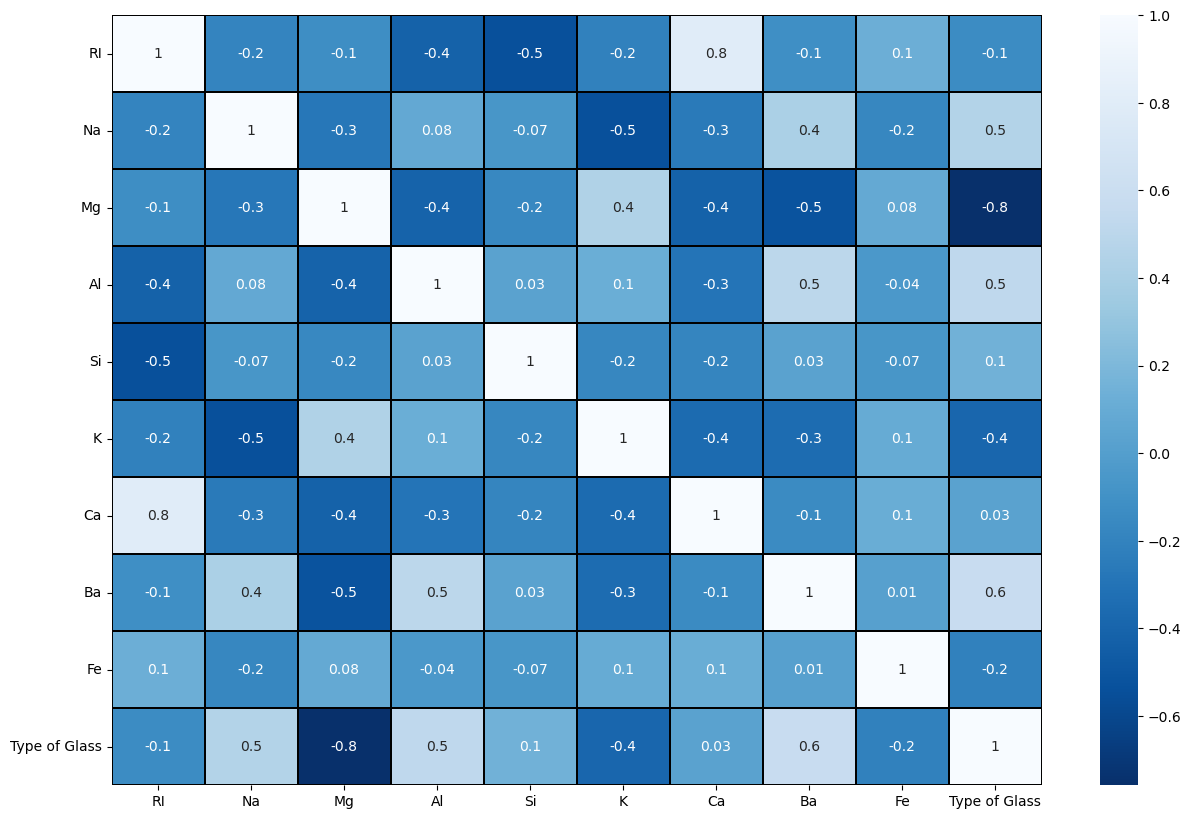

In [80]:
# Visualizing the correlation matrix by plotting the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

In [81]:
cor['Type of Glass'].sort_values(ascending=False)

Type of Glass    1.000000
Ba               0.574920
Al               0.521192
Na               0.452336
Si               0.148072
Ca               0.027754
RI              -0.134500
Fe              -0.212211
K               -0.389353
Mg              -0.758289
Name: Type of Glass, dtype: float64

We observe positive and negative correlated features with the target

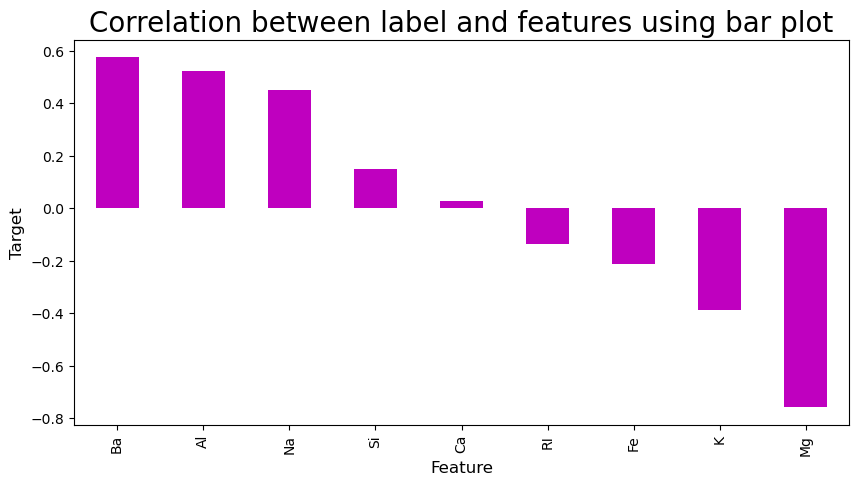

In [82]:
# Visualizing the correlation between label and features using bar plot
plt.figure(figsize=(10,5))
df.corr()['Type of Glass'].sort_values(ascending=False).drop(['Type of Glass']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.title("Correlation between label and features using bar plot", fontsize=20)
plt.show()

In [83]:
# Separating features and label
x=df.drop("Type of Glass",axis=1)
y=df["Type of Glass"]

In [84]:
# Feature scaling using standard scalarization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.874320,0.284953,1.254639,-0.634449,-1.127082,-0.835901,-0.093752,-0.461130,-0.694918
1,-0.248857,0.591817,0.636168,-0.057329,0.102319,0.346205,-0.854001,-0.461130,-0.694918
2,-0.721921,0.149933,0.601422,0.300216,0.438787,0.188105,-0.897556,-0.461130,-0.694918
3,-0.232324,-0.242853,0.698710,-0.204901,-0.052974,0.485589,-0.522510,-0.461130,-0.694918
4,-0.311689,-0.169205,0.650066,-0.313611,0.555256,0.455958,-0.648318,-0.461130,-0.694918
...,...,...,...,...,...,...,...,...,...
209,-0.705373,0.898681,-1.865511,2.344370,-0.052974,-0.716931,0.237465,2.263954,-0.694918
210,-0.500226,1.856097,-1.865511,1.086101,0.529374,-2.018006,-0.374207,2.389531,-0.694918
211,0.755501,1.168721,-1.865511,1.134079,0.995252,-2.018006,-0.341635,2.399355,-0.694918
212,-0.612717,1.193270,-1.865511,1.005054,1.241133,-2.018006,-0.309200,2.385524,-0.694918


In [85]:
# Checking Variance Inflation Factor in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,7.318794,RI
1,4.271633,Na
2,5.180361,Mg
3,3.131662,Al
4,3.646615,Si
5,3.808244,K
6,9.410479,Ca
7,2.649854,Ba
8,1.099911,Fe


In [86]:
y.value_counts()

1    163
2     51
Name: Type of Glass, dtype: int64

Here the data is not balanced. Since it is a classification problem, we will balance the data using over sampling method

In [87]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [88]:
y.value_counts()

1    163
2     51
Name: Type of Glass, dtype: int64

In [89]:
y1.value_counts()

1    163
2    163
Name: Type of Glass, dtype: int64

In [91]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxaccu=0
maxrs=0
for i in range (1,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=1)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print("Best Accuracy is",maxaccu,"at random_state",maxrs)

Best Accuracy is 0.975609756097561 at random_state 7


The best accuracy is 97.56% at random_state 7

In [92]:
# Classification Algorithms
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [93]:
# Checking accuracy for Random Forest Classifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9512195121951219
[[42  1]
 [ 3 36]]
              precision    recall  f1-score   support

           1       0.93      0.98      0.95        43
           2       0.97      0.92      0.95        39

    accuracy                           0.95        82
   macro avg       0.95      0.95      0.95        82
weighted avg       0.95      0.95      0.95        82



In [94]:
# Checking accuracy for Logistic Regression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.926829268292683
[[41  2]
 [ 4 35]]
              precision    recall  f1-score   support

           1       0.91      0.95      0.93        43
           2       0.95      0.90      0.92        39

    accuracy                           0.93        82
   macro avg       0.93      0.93      0.93        82
weighted avg       0.93      0.93      0.93        82



In [95]:
# Checking accuracy for Gradient Boosting Classifier
GB=LogisticRegression()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.926829268292683
[[41  2]
 [ 4 35]]
              precision    recall  f1-score   support

           1       0.91      0.95      0.93        43
           2       0.95      0.90      0.92        39

    accuracy                           0.93        82
   macro avg       0.93      0.93      0.93        82
weighted avg       0.93      0.93      0.93        82



In [96]:
# Checking accuracy for Support Vector Machine Classifier
SVC=SVC()
SVC.fit(x_train,y_train)
predSVC=SVC.predict(x_test)
print(accuracy_score(y_test,predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

0.9512195121951219
[[42  1]
 [ 3 36]]
              precision    recall  f1-score   support

           1       0.93      0.98      0.95        43
           2       0.97      0.92      0.95        39

    accuracy                           0.95        82
   macro avg       0.95      0.95      0.95        82
weighted avg       0.95      0.95      0.95        82



In [97]:
# Checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.9634146341463414
[[43  0]
 [ 3 36]]
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        43
           2       1.00      0.92      0.96        39

    accuracy                           0.96        82
   macro avg       0.97      0.96      0.96        82
weighted avg       0.97      0.96      0.96        82



In [98]:
# Checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9634146341463414
[[43  0]
 [ 3 36]]
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        43
           2       1.00      0.92      0.96        39

    accuracy                           0.96        82
   macro avg       0.97      0.96      0.96        82
weighted avg       0.97      0.96      0.96        82



In [99]:
# Checking accuracy for ExtraTrees Classifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
predETC=ETC.predict(x_test)
print(accuracy_score(y_test,predETC))
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

0.9634146341463414
[[43  0]
 [ 3 36]]
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        43
           2       1.00      0.92      0.96        39

    accuracy                           0.96        82
   macro avg       0.97      0.96      0.96        82
weighted avg       0.97      0.96      0.96        82



In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
# Checking cv score for a Random Forest Classifier
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predRFC)-score.mean())

[0.96969697 1.         0.95384615 0.81538462 1.        ]
0.9477855477855478
Differrence between accuracy score and cross validation score is 0.0034339644095741084


In [102]:
# Checking cv score for a Logistic Regression
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predLR)-score.mean())

[0.90909091 1.         0.95384615 0.83076923 0.96923077]
0.9325874125874126
Differrence between accuracy score and cross validation score is -0.00575814429472965


In [103]:
# Checking cv score for a Gradient Boosting Classifier
score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predGB)-score.mean())

[0.90909091 1.         0.95384615 0.83076923 0.96923077]
0.9325874125874126
Differrence between accuracy score and cross validation score is -0.00575814429472965


In [104]:
# Checking cv score for a SVM Classifier
score=cross_val_score(SVC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predSVC)-score.mean())

[0.96969697 1.         0.98461538 0.83076923 0.98461538]
0.9539393939393939
Differrence between accuracy score and cross validation score is -0.002719881744271957


In [105]:
# Checking cv score for a AdaBoost Classifier
score=cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predABC)-score.mean())

[0.96969697 0.98461538 0.93846154 0.89230769 0.98461538]
0.9539393939393939
Differrence between accuracy score and cross validation score is 0.009475240206947566


In [106]:
# Checking cv score for a Bagging Classifier
score=cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predBC)-score.mean())

[0.93939394 1.         0.95384615 0.78461538 0.98461538]
0.9324941724941725
Differrence between accuracy score and cross validation score is 0.030920461652168885


In [107]:
# Checking cv score for a ExtraTrees Classifier
score=cross_val_score(ETC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predETC)-score.mean())

[0.96969697 1.         0.98461538 0.83076923 1.        ]
0.957016317016317
Differrence between accuracy score and cross validation score is 0.006398317130024478


Support Vector Machine Classifier is our best model as the difference between accuracy score and cross validation score is least